In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from loading import *
import matplotlib.pyplot as plt

In [3]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [4]:
plt.style.use('seaborn-paper')

## Loading Data

- tradition distances integer values between 0 and n
- transformation distances integer values between 1 and n
- jump tradition and transformation distances for thos publications without links in either of them

For example, if a publication has Nan in both tradition and jump_tradition, it is completely disconnected.
Nans basically mean that there is no path to the current year (the publication according to our model *cannot* be alive).

In [5]:
year = 1990
trans_dists = load_transformation_distances(year)
trad_dists = load_tradition_distances(year)
jump_trad_dists = load_jump_tradition_distances(year)
jump_trans_dists = load_jump_transformation_distances(year)

See that the corresponding claim holds, only the concept distances contain all the publications:

In [6]:
len(trans_dists), len(trad_dists), len(jump_trans_dists), len(jump_trad_dists)

(44603, 75153, 56392, 25842)

In [7]:
len(trans_dists) + len(jump_trans_dists), len(trad_dists) + len(jump_trad_dists)

(100995, 100995)

We can see that in this case all the publications would be connected to 1990 by **both** tradition and transformation. The topic jump accomplishes this in the corresponding year.

For convenience, simply load the whole table for a given year:

In [8]:
merged_dists = load_distances(year)
merged_dists.head()

,transformation_distance,tradition_distance,jump_tradition_distance,jump_transformation_distance,concept_distance
pub_id,,,,,
00ca027b-5174-40fa-bf63-9a97c2a5f518,NaN,0.0,NaN,0.0,0.931662
02804a61-a180-4f77-8edf-ff630ddd5ceb,2.0,0.0,NaN,NaN,0.139581
02a186be-84bc-4c44-9fd6-2b15d9123607,NaN,NaN,0.0,0.0,0.293252
02d48327-6f23-4906-b2fb-c1ff66bf6b74,2.0,NaN,0.0,NaN,0.370128
03cda805-9746-48bb-a04d-02c2dac201c7,3.0,1.0,NaN,NaN,0.505764


It might further be interesting to remove the unconnected components before conducting the analysis. We have to see how it affects the analysis though. Apparently, using the topic jump allows us to fit nearly every paper.

In [9]:
pubs = load_disconnected_publications()
filtered_merged_dists = merged_dists.loc[merged_dists.index.difference(pubs.index)]

In [10]:
len(merged_dists), len(filtered_merged_dists)

(100995, 96487)

## Data Analysis

### Distribution of papers / year

In [11]:
ys = load_indices_years()

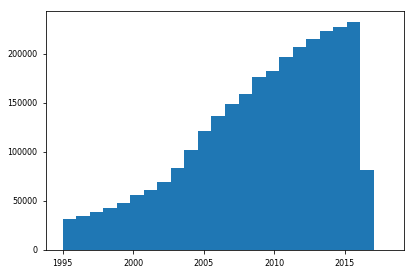

In [12]:
y = ys[ys.year >= 1995]
plt.hist(y.year, bins=len(np.unique(y.year)))
plt.show()

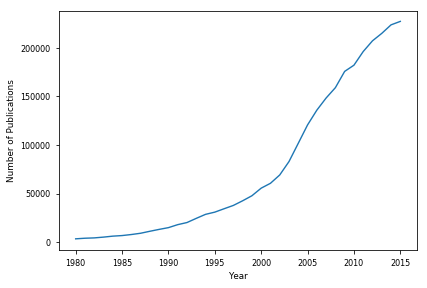

In [74]:
yes = list(range(1980, 2016))
plt.plot(yes, [len(ys[ys.year==y]) for y in yes], label='Publications')
plt.ylabel('Number of Publications')
plt.xlabel('Year')
plt.show()

Exponential increase of the publications in the field of computer science. Might be in science generally or simply the crazy growth of CS.

### Concatenate all the distances to years 1970 until 2017

In [39]:
dfs = []
for year in range(1945, 2017):
    print(year, end='\t')
    df = load_graph_distances(year)
    df['year'] = year
    dfs.append(df)
frame = pd.concat(dfs)

1945	1946	1947	1948	1949	1950	1951	1952	1953	1954	1955	1956	1957	1958	1959	1960	1961	1962	1963	1964	1965	1966	1967	1968	1969	1970	1971	1972	1973	1974	1975	1976	1977	1978	1979	1980	1981	1982	1983	1984	1985	1986	1987	1988	1989	1990	1991	1992	1993	1994	1995	1996	1997	1998	1999	2000	2001	2002	2003	2004	2005	2006	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	

### Sample a paper and look at its distances to the following years (if existent)
In particular look at pubs before 2005 otherwise not very interesting due to horizon.

In [14]:
pub_indices = ys[ys.year<2005].index

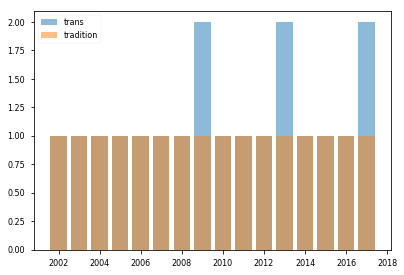

In [15]:
sample = np.random.randint(len(pub_indices))
pub = pub_indices[sample]
# look at distances from the publication to the following years
pub_dists = frame.loc[pub].sort_values('year')
if not all(pub_dists.transformation_distance.isna()):
    plt.bar(pub_dists.year, pub_dists.transformation_distance, label='trans', alpha=0.5)
if not all(pub_dists.tradition_distance.isna()):
    # + 1 becuase 0 is not visible of course..
    plt.bar(pub_dists.year, pub_dists.tradition_distance+1, label='tradition', alpha=0.5)
plt.legend()
plt.show()

### Average distances to next years of pubs in a given year
Now look at all publications of a specific year and check their distances to the pubs of the following years in alignment with the below analysis we choose 1990.

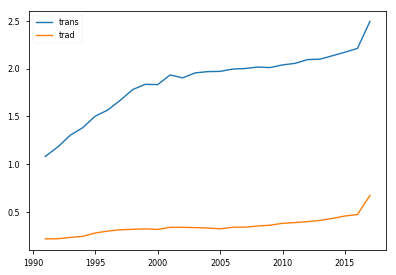

In [16]:
year = 1990
ixs = ys[ys.year==year].index
subf = frame.loc[ixs]
grp = subf.groupby('year').mean()  # replace with median/max/min if desired
plt.plot(grp.transformation_distance, label='trans')
plt.plot(grp.tradition_distance, label='trad')
plt.legend()
plt.show()

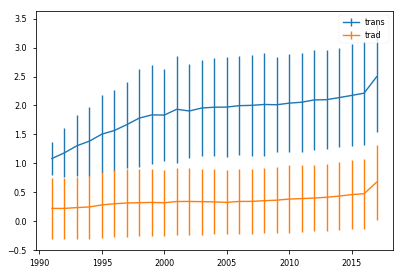

In [17]:
std = subf.groupby('year').std()
plt.errorbar(grp.transformation_distance.index, grp.transformation_distance, yerr=std.transformation_distance, label='trans')
plt.errorbar(grp.tradition_distance.index, grp.tradition_distance, yerr=std.tradition_distance, label='trad')
plt.legend()
plt.show()

The second one is not very informative though but just for reference...

### Distribution of Aliveness over years

In particular select the fraction of publications that we don't consider alive by the respective metrics.

In [18]:
years = list(set(frame.year))

In [19]:
perc_dead_trad = []
perc_dead_tran = []
perc_dead = []
for year in years:
    # sum on booleans uses the 0 1 properties of bool
    yframe = frame[frame.year == year] 
    perc_dead_trad.append(sum(yframe.tradition_distance.isna()) / len(yframe))
    perc_dead_tran.append(sum(yframe.transformation_distance.isna()) / len(yframe))
    perc_dead.append(sum(yframe.transformation_distance.isna() & yframe.tradition_distance.isna()) / len(yframe))

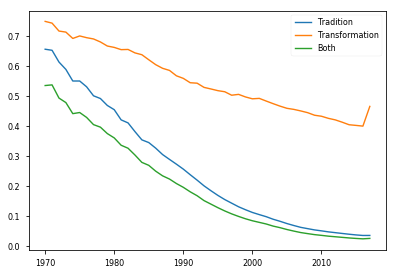

In [20]:
plt.plot(years, perc_dead_trad, label='Tradition')
plt.plot(years, perc_dead_tran, label='Transformation')
plt.plot(years, perc_dead, label='Both')
plt.legend()
plt.show()

### Distribution of Aliveness for publications of a single year

Does the saturation also happen for the individual publications of each year before these. Let us consider the publications of year 1990 and look at the following years and their aliveness:

In [21]:
year = 1990
pubs = ys[ys.year==year].index

In [22]:
years = list(range(year+1, 2018))

In [23]:
perc_nas_trad = []
perc_nas_tran = []
for year in years:
    yframe = frame[frame.year == year] 
    yframe = yframe.loc[pubs]
    perc_nas_trad.append(sum(yframe.tradition_distance.isna()) / len(yframe))
    perc_nas_tran.append(sum(yframe.transformation_distance.isna()) / len(yframe))

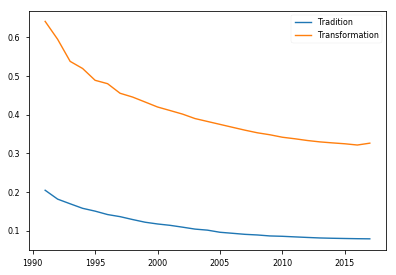

In [24]:
plt.plot(years, perc_nas_trad, label='Tradition')
plt.plot(years, perc_nas_tran, label='Transformation')
plt.legend()
plt.show()

### Probability of aliveness versus path-length in a given year

In [25]:
year = 1990
pubs = ys[ys.year==year].index
years = list(range(year+1, 2017))

In [26]:
perc_nas_trad = []
perc_nas_tran = []
for year in years:
    yframe = frame[frame.year == year] 
    yframe = yframe.loc[pubs]
    perc_nas_trad.append(sum(yframe.tradition_distance.isna()) / len(yframe))
    perc_nas_tran.append(sum(yframe.transformation_distance.isna()) / len(yframe))

In [27]:
subf = frame.loc[pubs]
subf = subf[subf.year < 2017]
grp = subf.groupby('year').mean()  # replace with median/max/min if desired

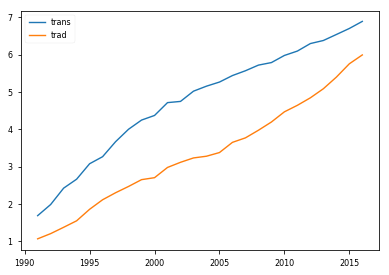

In [28]:
plt.plot(grp.transformation_distance/np.array(perc_nas_tran), label='trans')
plt.plot(grp.tradition_distance/np.array(perc_nas_trad), label='trad')
plt.legend()
plt.show()

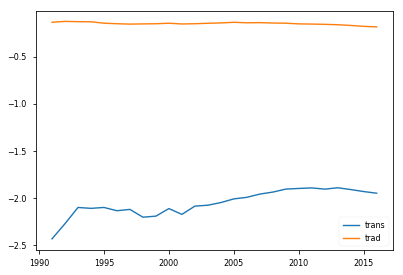

In [29]:
plt.plot(grp.transformation_distance/np.log(np.array(perc_nas_tran)), label='trans')
plt.plot(grp.tradition_distance/np.log(np.array(perc_nas_trad)), label='trad')
plt.legend()
plt.show()

### Report Plots

#### Aliveness

In [48]:
start, end, step = 1980, 2000, 2

In [52]:
perc_dead_trad = []
perc_dead_tran = []
perc_dead = []
for year in range(1980, 2016):
    # sum on booleans uses the 0 1 properties of bool
    yframe = frame[frame.year == year] 
    perc_dead_trad.append(1- sum(yframe.tradition_distance.isna()) / len(yframe))
    perc_dead_tran.append(1- sum(yframe.transformation_distance.isna()) / len(yframe))
    perc_dead.append(1- sum(yframe.transformation_distance.isna() & yframe.tradition_distance.isna()) / len(yframe))

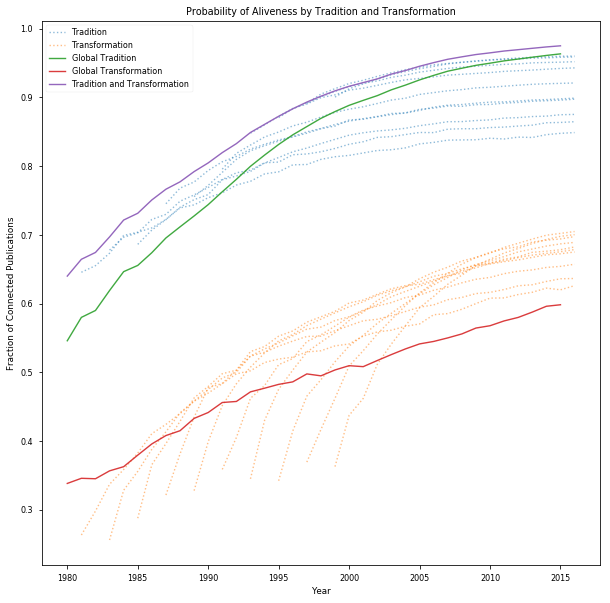

In [53]:
fig = plt.figure(1, figsize=(10, 10))
c1, c2 = None, None
for year in range(start, end, step):
    pubs = ys[ys.year==year].index
    years = list(range(year+1, 2017))
    perc_nas_trad = []
    perc_nas_tran = []
    for y in years:
        yframe = frame[frame.year == y] 
        yframe = yframe.loc[pubs]
        perc_nas_trad.append(1 - sum(yframe.tradition_distance.isna()) / len(yframe))
        perc_nas_tran.append(1 - sum(yframe.transformation_distance.isna()) / len(yframe))
    if year == start:
        line1, = plt.plot(years, perc_nas_trad, label='Tradition', linestyle=':', alpha=0.7)
        line2, = plt.plot(years, perc_nas_tran, label='Transformation', linestyle=':', alpha=0.7)
        c1, c2 = line1.get_color(), line2.get_color()
    else:
        plt.plot(years, perc_nas_trad, color=c1, linestyle=':', alpha=0.5)
        plt.plot(years, perc_nas_tran, color=c2, linestyle=':', alpha=0.5)
plt.plot(range(1980, 2016), perc_dead_trad, label='Global Tradition', alpha=0.9)
plt.plot(range(1980, 2016), perc_dead_tran, label='Global Transformation', alpha=0.9)
plt.plot(range(1980, 2016), perc_dead, label='Tradition and Transformation')
plt.title('Probability of Aliveness by Tradition and Transformation')
plt.xlabel('Year')
plt.ylabel('Fraction of Connected Publications')
plt.legend()
plt.show()

#### Distances

In [63]:
start, end, step = 1980, 2007, 2

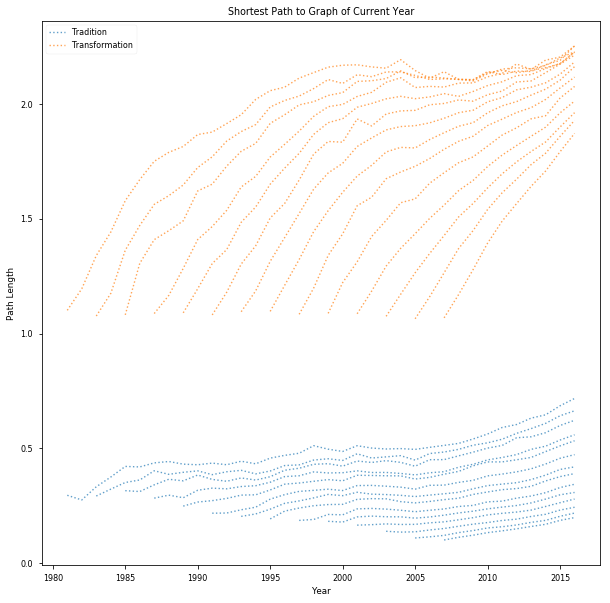

In [64]:
fig = plt.figure(1, figsize=(10, 10))
c1, c2 = None, None
for year in range(start, end, step):
    pubs = ys[ys.year==year].index
    subf = frame.loc[pubs]
    grp = subf.groupby('year').mean()
    if year == start:
        line1, = plt.plot(grp.index, list(grp.tradition_distance), 
                          label='Tradition', linestyle=':', alpha=0.7)
        line2, = plt.plot(grp.index, list(grp.transformation_distance), 
                          label='Transformation', linestyle=':', alpha=0.7)
        c1, c2 = line1.get_color(), line2.get_color()
    else:
        plt.plot(grp.index, list(grp.tradition_distance), color=c1, linestyle=':', alpha=0.7)
        plt.plot(grp.index, list(grp.transformation_distance), color=c2, linestyle=':', alpha=0.7)
plt.title('Shortest Path to Graph of Current Year')
plt.xlabel('Year')
plt.ylabel('Path Length')
plt.legend()
plt.show()